## Project: Investigate a Dataset - **No-show appointments**




In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Data/data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Question(s) for Analysis

1. Is gender effecting "No-show" data? 
2. Is there any seasonal aeffect on "No-show" data? 
3. what is the effect of age on "No-show" data?
4. what is the effect of neighbourhood on "No-show" data?
5. Is SMS effecting "No-show" data?
6. What is the most effecting illness (Hipertension, Diabetes, Alcholism, Handcap) on "No-show" data?
7. Is there any corelation between No_show and delta time ( Appointment Day - Scheduled Day)



### Data Wrangling


#### General Properties

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


According to .info() there is **110527 rows** and **14 columns**. There is **no null data** in our structure. "ScheduledDay" and "AppointmentDay" are should be **date format** and "Gender" and "No-date" might be "1-0" or "true" -"false"

In [120]:
# Change object to date format

df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [121]:
# Change the object format to 1-0 and integer for "No-show"

df.loc[df["No-show"] == "No", "No-show"] = 0
df.loc[df["No-show"] == "Yes", "No-show"] = 1
df["No-show"] = df["No-show"].astype('int')

df.loc[df["Gender"] == "M", "Gender"] = 0
df.loc[df["Gender"] == "F", "Gender"] = 1
df["Gender"] = df["Gender"].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  int32              
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [122]:
df.describe()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,0.649977,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


According to decribe function; 
* **Gender:** Female rate is ~%65
* **Age:** can not be -1, mean is ~37
* **Scolarship** rate is ~%10
* **Hipertension** rate is ~%7
* **Alcholism** rate is ~%3
* **Handcap** rate is %2
* **Recieved SMS** rate is ~%32
* **the person who not be in appointment** rate ~%20

### Data Cleaning

In [123]:
df[(df.Age < 0)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,1,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0


There is one patient who is below 0 age. So It can be drop.

In [124]:
df.drop(99832, inplace=True)
df[(df.Age < 0)]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Now there is no patient blow 0 years old.

In [125]:
# I changed column name because in following step I couldn't get the "No-show" so I renamed as "No_show"

df.rename(columns={"No-show" : "No_show"}, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,1,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,0,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,1,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,1,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,1,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


## 1. Is gender effecting "No-show" data? 

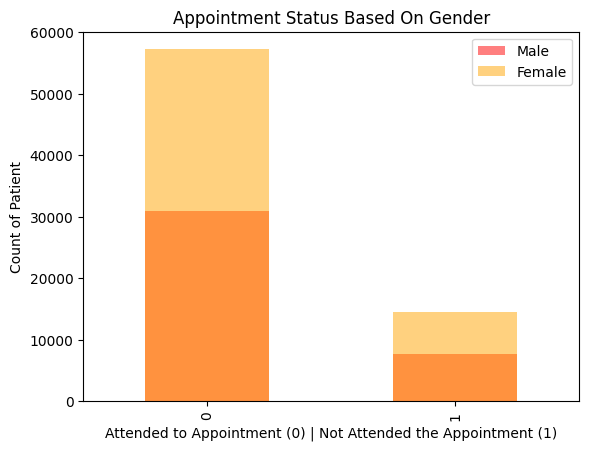

In [126]:
male = df.Gender == 0
female = df.Gender == 1

df.No_show[male]            # For Male, How much of them attended or not attended 
df.No_show[female]          # For Female, How much of them attended or not attended 

df.No_show[male].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='Male')          # Graph for Male
df.No_show[female].value_counts().plot(kind='bar',alpha=0.5, color= 'orange', label='Female')   # Graph for Female
plt.xlabel("Attended to Appointment (0) | Not Attended the Appointment (1)")
plt.ylabel("Count of Patient")
plt.title('Appointment Status Based On Gender')
plt.legend()

### Comment:
According to graph, nearly half of males are not attend to appointment. And the situation is same for females. So I can say that rate of attended the appointment for males and females is same. There is no specific difference between male and female. I can not say female percentage is higher than males or opposite. To understand more clear we should find the **percentages** as below. 

In [127]:
male_count = df.No_show[male].value_counts(normalize=True)
female_count = df.No_show[female].value_counts(normalize=True)
male_count["Attendet to Appointment"] = male_count.pop(0)
male_count["Not Attendet to Appointment"] = male_count.pop(1)
female_count["Attendet to Appointment"] = female_count.pop(0)
female_count["Not Attendet to Appointment"] = female_count.pop(1)
print('Male:\n{}\nFemale:\n{}'.format(male_count,female_count))


Male:
Attendet to Appointment        0.800321
Not Attendet to Appointment    0.199679
Name: No_show, dtype: float64
Female:
Attendet to Appointment        0.796851
Not Attendet to Appointment    0.203149
Name: No_show, dtype: float64


### Comment:
According to numbers percentages of Males and Females is nearly equal. 

### **Conclusion-1**
I have performed how many of males or females are attended or not attended the appointment. Graph is showing us males and females rate is not different. Also I have calculated the percantages. and percantages are similar as I found in graph. I can say that there is **no difference** between male and female rate on "No-show" data. 

## 2. Is there any seasonal effect on "No-show" data? 

Firstly I need a histogram for time serie to find the data is involve all dates. I would like to see that the number of date shoul be expand. 

Text(0.5, 1.0, 'Histogram of Scheduled Day')

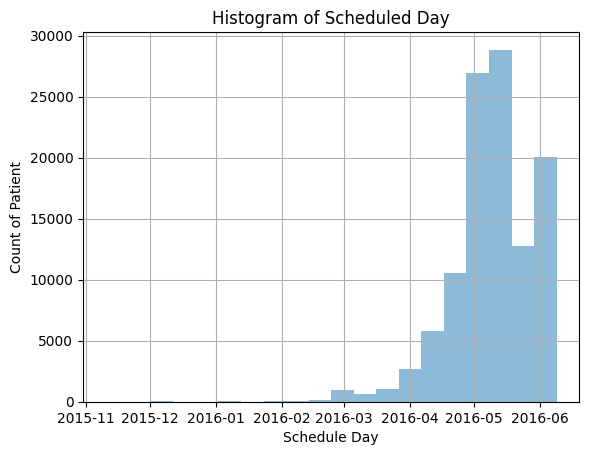

In [128]:
df.ScheduledDay.hist(alpha=0.5, bins=20)
plt.xlabel("Schedule Day")
plt.ylabel("Count of Patient")
plt.title('Histogram of Scheduled Day')


### **Conclusion-2**
Unfortunately, huge number of data come from between 2016-04 and 2016-06. So it wouldn't be right to analysis that like in winter people are not attend the meeting or opposite. 

## 3. what is the effect of age on "No-show" data?

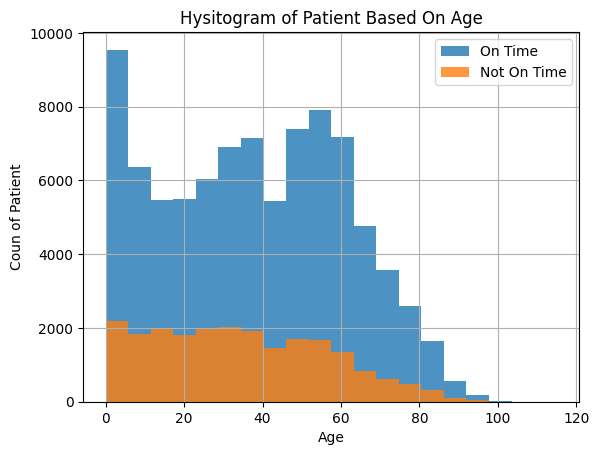

In [129]:
onTime = df.No_show == 0
notOnTime = df.No_show == 1

df.Age[onTime].hist(alpha=0.8, bins=20, label='On Time')
df.Age[notOnTime].hist(alpha=0.8, bins=20, label='Not On Time')
plt.xlabel("Age")
plt.ylabel("Coun of Patient")
plt.title('Hysitogram of Patient Based On Age')
plt.legend()


Babies are most likely to arrive on time for appointments. 50s follows the babies. But I need to group by age and create new data frame for each age group to analyse more accurate.

In [130]:
# Firstly I create new dataframe for each age group.

dfChild = df.copy()
df7_17 = df.copy()
df17_30 = df.copy()
df30_50 = df.copy()
df50_ = df.copy()

# Then I filtered the 'Age' column according to condition. 

dfChild = dfChild[dfChild['Age'].between(0,7)]
df7_17 = df7_17[df7_17['Age'].between(8,17)]
df17_30 = df17_30[df17_30['Age'].between(18,30)]
df30_50 = df30_50[df30_50['Age'].between(31,50)]
df50_ = df50_[df50_['Age'].between(51,116)]

# Lets check one of them the application is right. I am expecting max and min ages are similar to condition.
df30_50.describe()


,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
count,2.947200e+04,2.947200e+04,29472.000000,29472.000000,29472.000000,29472.000000,29472.000000,29472.000000,29472.000000,29472.000000,29472.000000
mean,1.496517e+14,5.675492e+06,0.694286,40.489448,0.139590,0.156012,0.045942,0.049742,0.021037,0.331874,0.207044
std,2.591494e+14,6.945000e+04,0.460717,5.828498,0.346567,0.362873,0.209363,0.217415,0.153340,0.470894,0.405194
min,3.921784e+04,5.122866e+06,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.283541e+12,5.639960e+06,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.315546e+13,5.679842e+06,1.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.495328e+13,5.724410e+06,1.000000,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999275e+14,5.790464e+06,1.000000,50.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000


In [131]:
mean_child = dfChild["No_show"].mean()
mean_7_17 = df7_17["No_show"].mean()
mean_18_30 = df17_30["No_show"].mean()
mean_30_50 = df30_50["No_show"].mean()
mean_50_ = df50_["No_show"].mean()

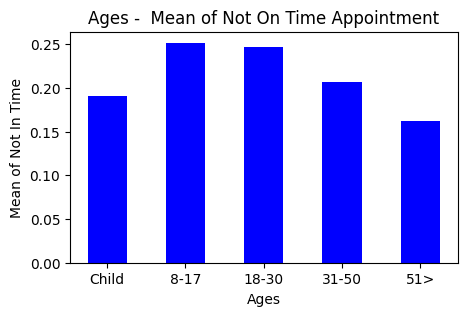

In [132]:
# Lets create a chart.

x_labels = ("Child","8-17", "18-30", "31-50", "51>")
y_labels = (mean_child, mean_7_17, mean_18_30, mean_30_50 , mean_50_)
fig = plt.figure(figsize = (5, 3))
plt.bar(x_labels, y_labels, color ='blue',
        width = 0.5)
plt.xlabel("Ages")
plt.ylabel("Mean of Not In Time")
plt.title("Ages -  Mean of Not On Time Appointment")
plt.show()

### **Conclusion-3:**
As patients old, they arrive **on time** for their appointments. And also it is valid for Child ages. 

## 4. What is the effect of neighbourhood on "No-show" data?

Firstly I would like to understand the sample size of neighbourhood according to our data.

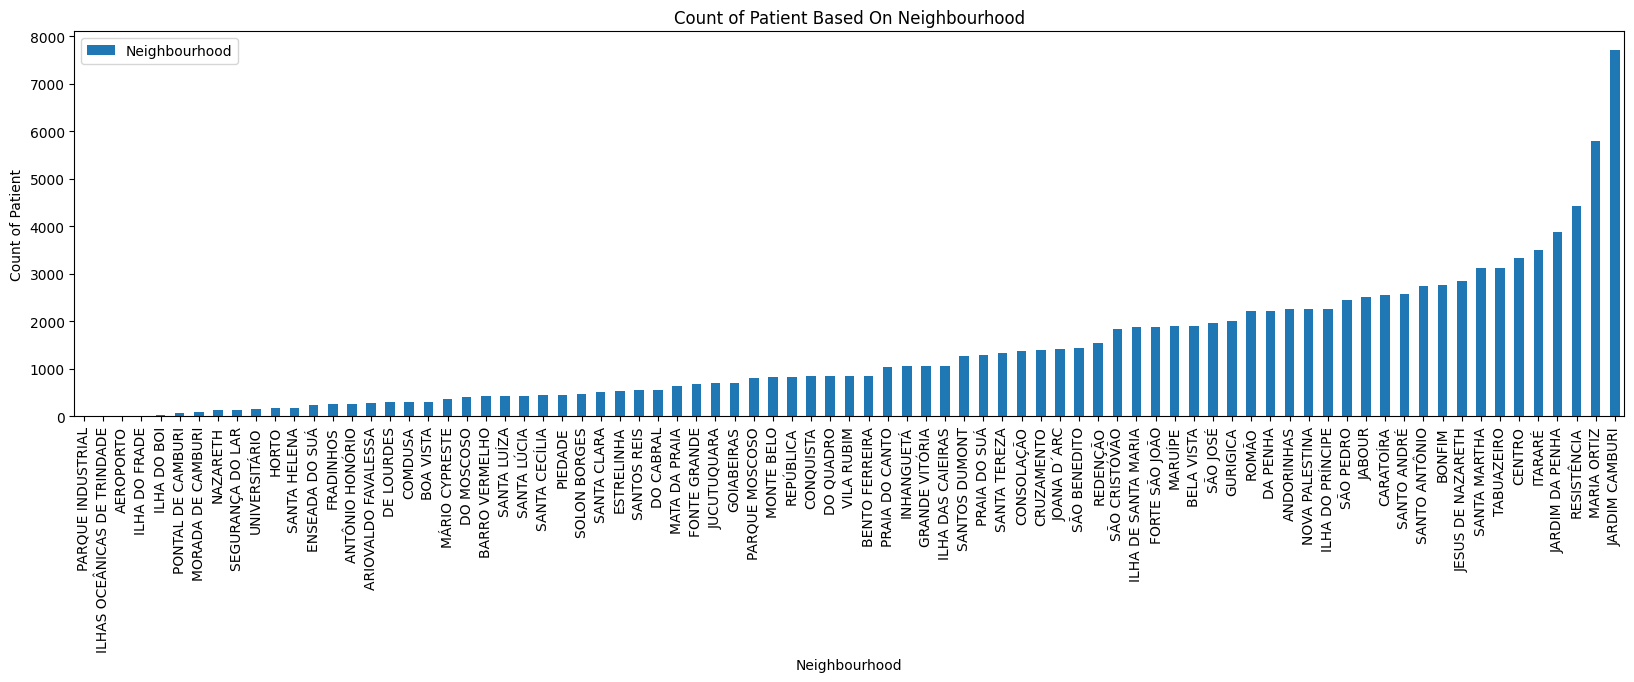

In [133]:
plt.figure(figsize=(20, 5))
df.groupby(['Neighbourhood'])['Neighbourhood'].count().sort_values().plot(kind= 'bar')
plt.xlabel("Neighbourhood")
plt.ylabel("Count of Patient")
plt.title('Count of Patient Based On Neighbourhood')
plt.legend()

Some neighbourhood size is very small like "Aeroporto, Parque Industrial, Ilhas Oseanicas de Trindade" and some of them very high like "Jardim Camburi". 

Lets see the rate of "No_show is True" by Neighbourhood. (Not in time appointment rate)

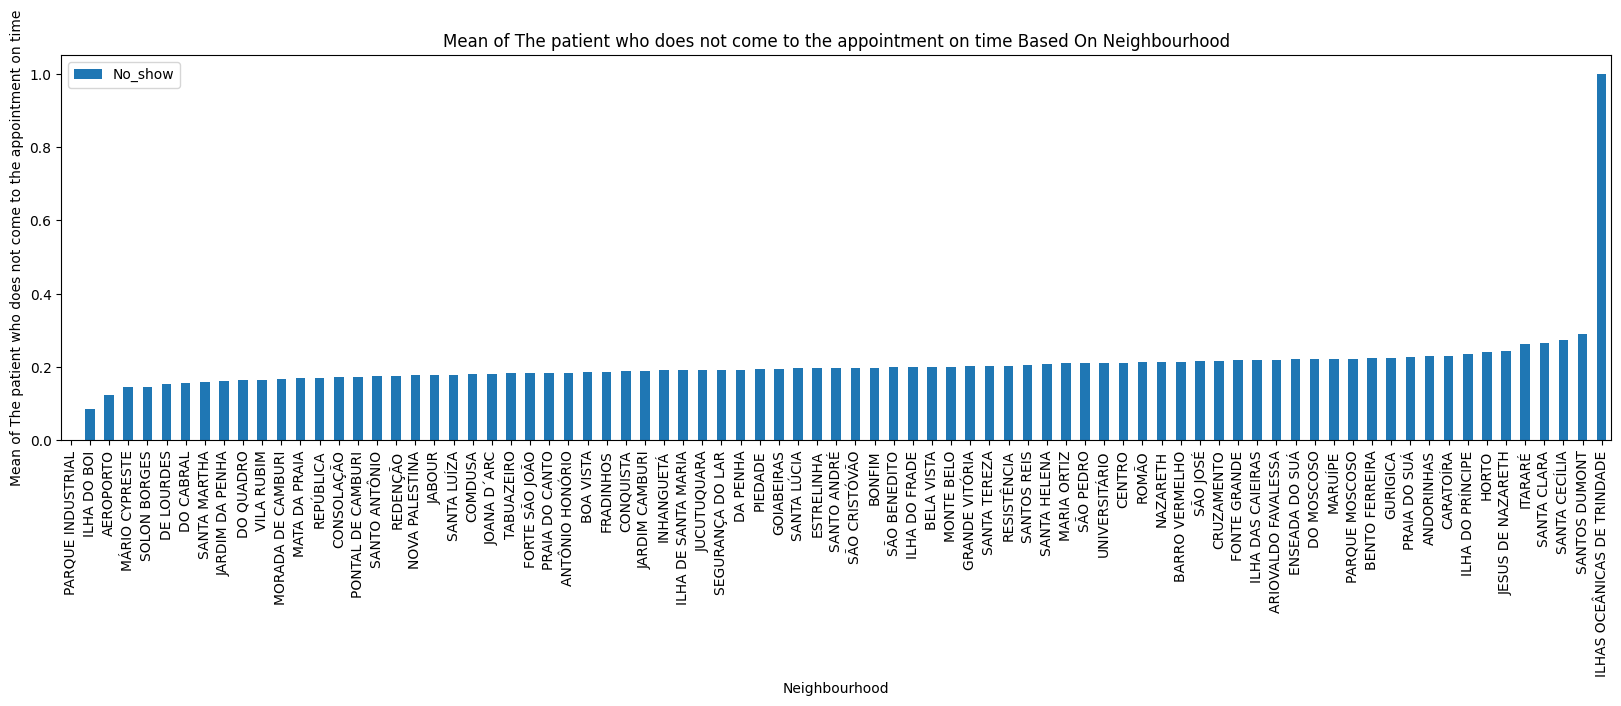

In [134]:
plt.figure(figsize=(20, 5))
df.groupby('Neighbourhood').No_show.mean().sort_values().plot(kind= 'bar') # The rate of not in time appointment
plt.xlabel("Neighbourhood")
plt.ylabel("Mean of The patient who does not come to the appointment on time")
plt.title('Mean of The patient who does not come to the appointment on time Based On Neighbourhood')
plt.legend()

According to plot, the rate of "No_show is True" is very similar for all areas except "Ilhas Oceanicas de Trindade" and "Paraque Industrial". All patients comes from "Ilhas Oceanicas de Trindade" are not attend the appointment in time. And none of  patients comes from "Paraque Industrial" are not attend the appointment late.

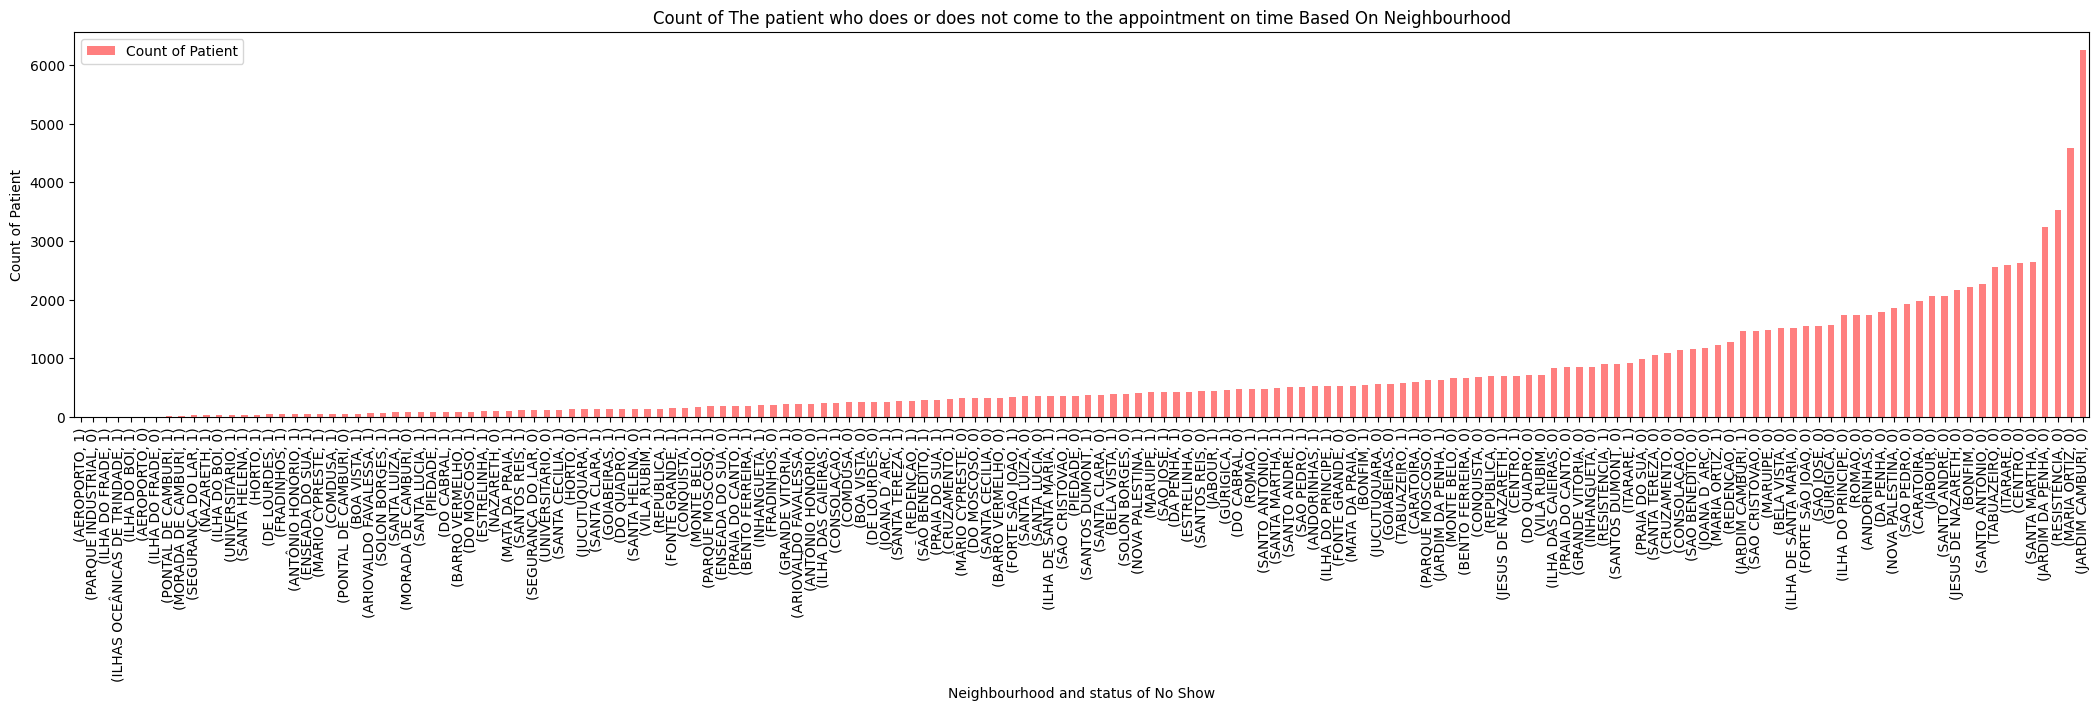

In [135]:
# Also we can see the detail of rate of top figure.

plt.figure(figsize=(26, 5))
df.groupby('Neighbourhood').No_show.value_counts().sort_values().plot(kind='bar', alpha=0.5, color= 'red', label='Count of Patient')
plt.xlabel("Neighbourhood and status of No Show")
plt.ylabel("Count of Patient")
plt.title('Count of The patient who does or does not come to the appointment on time Based On Neighbourhood')
plt.legend()

The most neighbroadhood which not come the appointment in time is "Jabdim Cambur". 

## **Conclusion-4:**
- Patients count come from different neighbourhood is not homogeneous.
- According to plot, the rate of "No_show is True" is very similar for all areas except "Ilhas Oceanicas de Trindade" and "Paraque Industrial". All patients comes from "Ilhas Oceanicas de Trindade" are not attend the appointment in time. And none of patients comes from "Paraque Industrial" are not attend the appointment late.
- The most neighbroadhood which not come the appointment in time is "Jabdim Cambur".   

## 5. Is SMS effecting "No-show" data?

First of all, I want to find out how many of the patients receive SMS.

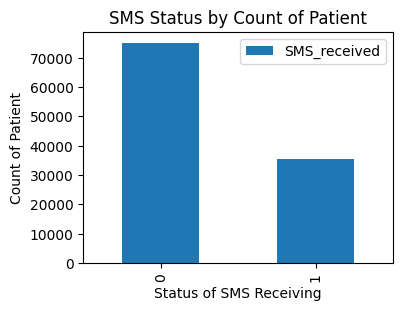

In [136]:
plt.figure(figsize=(4, 3))
df.groupby(['SMS_received'])['SMS_received'].count().plot(kind= 'bar')
plt.xlabel("Status of SMS Receiving")
plt.ylabel("Count of Patient")
plt.title('SMS Status by Count of Patient')
plt.legend()

According to figure, only **1/3** of patient have received SMS. What is count relation between SMS and no_show? 

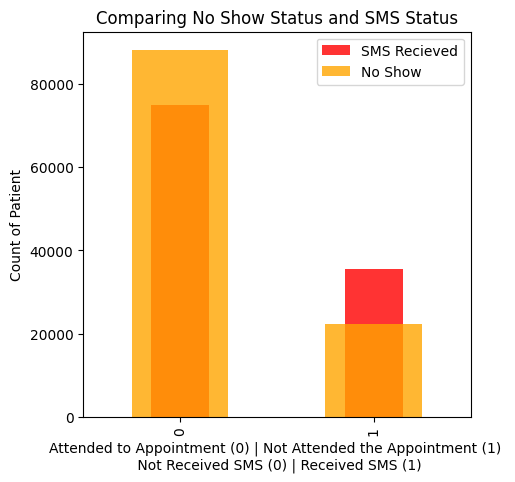

In [137]:
plt.figure(figsize=(5, 5))
df.groupby(['SMS_received'])['SMS_received'].count().plot(kind='bar',alpha=0.8, color= 'red', width=0.3, label='SMS Recieved') 
df.groupby(['No_show'])['No_show'].count().plot(kind='bar',alpha=0.8, color= 'orange', label='No Show') 

plt.xlabel("Attended to Appointment (0) | Not Attended the Appointment (1) \n Not Received SMS (0) | Received SMS (1)")
plt.ylabel("Count of Patient")
plt.title("Comparing No Show Status and SMS Status")
plt.legend()

I would expecting that If not the patient received SMS won't be in appointment in time. But in this graph even the SMS Receiving count is high No Show value is high too. I need to calculate a rate that are they the same person. 

In [138]:
# I suppose I will use this calculation a few time :). So I defined a functon for that.  

def calculateMyCorelation(dataframe, corelationList):
    dataframe.loc[dataframe[corelationList[0]] == dataframe[corelationList[1]], 'is_similar'] = 1
    dataframe.loc[dataframe[corelationList[0]] != dataframe[corelationList[1]], 'is_similar'] = 0
    x = dataframe['is_similar'].mean()
    print('%{} of all patients have corelation between {} and {}'.format((round(x,3)*100), corelationList[0], corelationList[1]))
    

In [139]:
corelation_list_SMS = ['SMS_received', 'No_show']
calculateMyCorelation(df, corelation_list_SMS)

%65.4 of all patients have corelation between SMS_received and No_show


65% of all patients have corelation between *received SMS* and *do not come to their appointment in time*.

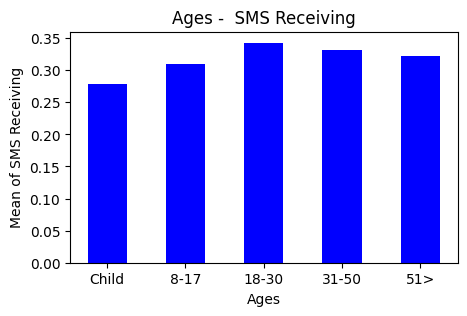

In [140]:
mean_child = dfChild["SMS_received"].mean()
mean_7_17 = df7_17["SMS_received"].mean()
mean_18_30 = df17_30["SMS_received"].mean()
mean_30_50 = df30_50["SMS_received"].mean()
mean_50_ = df50_["SMS_received"].mean()

# Lets create a chart.

x_labels = ("Child","8-17", "18-30", "31-50", "51>")
y_labels = (mean_child, mean_7_17, mean_18_30, mean_30_50 , mean_50_)
fig = plt.figure(figsize = (5, 3))
plt.bar(x_labels, y_labels, color ='blue',
        width = 0.5)
plt.xlabel("Ages")
plt.ylabel("Mean of SMS Receiving")
plt.title("Ages -  SMS Receiving")
plt.show()

The most receiving SMS ages are between 18-30 years old. But there is no much difference between age groups except Child ages. 

## *Conclusion-5*
- Only **1/3** of patient have received SMS.
- Even the SMS Receiving count is **high** No Show value is high too.
- 65% of all patients have corelation between *received SMS* and *do not come to their appointment in time*.
- The most receiving SMS ages are between 18-30 years old. But there is no much difference between age groups except Child ages. 

## 6. What is the most effecting illness (Hipertension, Diabetes, Alcoholism, Handcap) on "No-show" data?

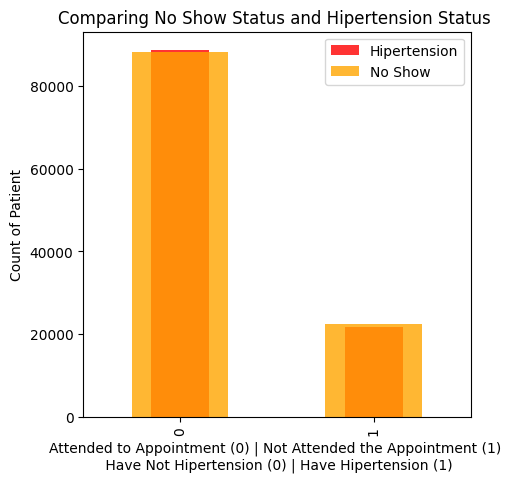

In [141]:
illness = ('Hipertension','Diabetes','Alcoholism', 'Handcap')

plt.figure(figsize=(5, 5))
df.groupby(['Hipertension'])['Hipertension'].count().plot(kind='bar',alpha=0.8, color= 'red', width=0.3, label='Hipertension') 
df.groupby(['No_show'])['No_show'].count().plot(kind='bar',alpha=0.8, color= 'orange', label='No Show') 

plt.xlabel("Attended to Appointment (0) | Not Attended the Appointment (1) \n Have Not Hipertension (0) | Have Hipertension (1)")
plt.ylabel("Count of Patient")
plt.title("Comparing No Show Status and Hipertension Status ")
plt.legend()

Count of hipertension and not attended the appointment in time is **extremely similar**. Well, is the count just *similar* or all person have hypertension **not attended the appointment in time**?

In [142]:
corelation_list_hiper = ['Hipertension', 'No_show']
calculateMyCorelation(df, corelation_list_hiper)

%66.9 of all patients have corelation between Hipertension and No_show


Even the counts are extremly similar, 67% of all patients have corelation between *hipertension* and *do not come to their appointment in time*.

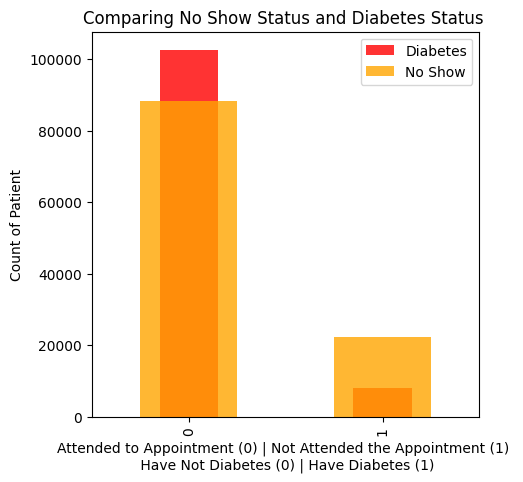

In [143]:
plt.figure(figsize=(5, 5))
df.groupby(['Diabetes'])['Diabetes'].count().plot(kind='bar',alpha=0.8, color= 'red', width=0.3, label='Diabetes') 
df.groupby(['No_show'])['No_show'].count().plot(kind='bar',alpha=0.8, color= 'orange', label='No Show') 

plt.xlabel("Attended to Appointment (0) | Not Attended the Appointment (1) \n Have Not Diabetes (0) | Have Diabetes (1)")
plt.ylabel("Count of Patient")
plt.title("Comparing No Show Status and Diabetes Status ")
plt.legend()

Count of hipertension and not attended the appointment is similar. I would like to see same percentage as "hipertension".

In [144]:
corelation_list_SMS = ['Diabetes', 'No_show']
calculateMyCorelation(df, corelation_list_SMS)

%75.2 of all patients have corelation between Diabetes and No_show


75% of all patients have corelation between *diabetes* and *do not come to their appointment in time.*

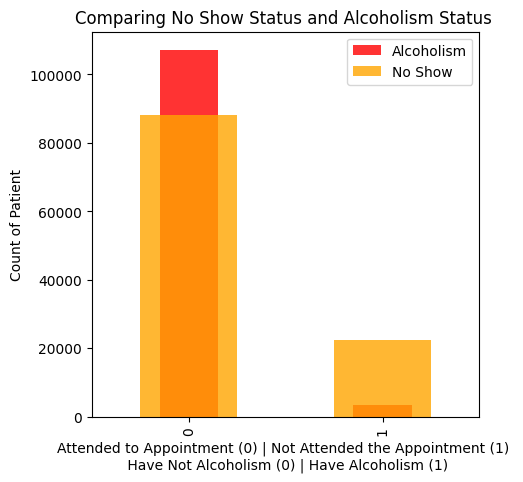

In [145]:
plt.figure(figsize=(5, 5))
df.groupby(['Alcoholism'])['Alcoholism'].count().plot(kind='bar',alpha=0.8, color= 'red', width=0.3, label='Alcoholism') 
df.groupby(['No_show'])['No_show'].count().plot(kind='bar',alpha=0.8, color= 'orange', label='No Show') 

plt.xlabel("Attended to Appointment (0) | Not Attended the Appointment (1) \n Have Not Alcoholism (0) | Have Alcoholism (1)")
plt.ylabel("Count of Patient")
plt.title("Comparing No Show Status and Alcoholism Status ")
plt.legend()

In [146]:
corelation_list_alcohol = ['Alcoholism', 'No_show']
calculateMyCorelation(df, corelation_list_alcohol)

%78.0 of all patients have corelation between Alcoholism and No_show


78% of all patients have corelation between *Alcoholism* and *do not come to their appointment in time.*

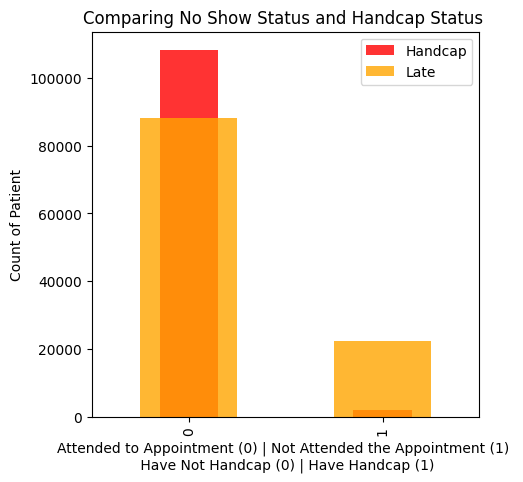

In [147]:
plt.figure(figsize=(5, 5))
df.groupby(['Handcap'])['Handcap'].count().plot(kind='bar',alpha=0.8, color= 'red', width=0.3, label='Handcap') 
df.groupby(['No_show'])['No_show'].count().plot(kind='bar',alpha=0.8, color= 'orange', label='Late') 

plt.xlabel("Attended to Appointment (0) | Not Attended the Appointment (1) \n Have Not Handcap (0) | Have Handcap (1)")
plt.ylabel("Count of Patient")
plt.title("Comparing No Show Status and Handcap Status ")
plt.legend()

In [148]:
corelation_list_alcohol = ['Handcap', 'No_show']
calculateMyCorelation(df, corelation_list_alcohol)

%78.5 of all patients have corelation between Handcap and No_show


78% of all patients have corelation between *Handcap* and *do not come to their appointment in time.*

### Conclusion-6:
- Even the counts are extremly similar, 67% of all patients have corelation between *hipertension* and do not come to their appointment in time.
- 75% of all patients have corelation between *diabetes* and do not come to their appointment in time.
- 78% of all patients have corelation between *Alcoholism* and do not come to their appointment in time.
- 79% of all patients have corelation between *Handcap* and do not come to their appointment in time.

## 7. Is there any corelation between No_show and delta time ( Appointment Day - Scheduled Day)

Firstly, I would like to calculate and add the "deltaTime" column

In [149]:
df["deltaTime"] = df["AppointmentDay"].dt.date - df["ScheduledDay"].dt.date
df.describe()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,is_similar,deltaTime
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526
mean,1.474934e+14,5.675304e+06,0.649974,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934,0.784784,10 days 04:24:39.789370826
std,2.560943e+14,7.129544e+04,0.476980,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,0.410974,15 days 06:07:14.979140739
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6 days +00:00:00
25%,4.172536e+12,5.640285e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0 days 00:00:00
50%,3.173184e+13,5.680572e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4 days 00:00:00
75%,9.438963e+13,5.725523e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,15 days 00:00:00
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,179 days 00:00:00


Appointment date should be greater than scheduledDay but according to description there are days below zero. I would like to investigate that.  

In [150]:
# Show the below zero

df.loc[df['deltaTime'] < "0"]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,is_similar,deltaTime
27033,7.839273e+12,5679978,0,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,1.0,-1 days
55226,7.896294e+12,5715660,1,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,1.0,-1 days
64175,2.425226e+13,5664962,1,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,0.0,-1 days
71533,9.982316e+14,5686628,1,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,0.0,-6 days
72362,3.787482e+12,5655637,0,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,0.0,-1 days


According to information they come **before** scheduled day. So they are not show on their scheduled day. It is specific situation. I would like to ignore this for this analysis.

In [151]:
dfDropIndex = df[df["deltaTime"] < "0"].index
dfDrop = df.copy()
dfDrop.drop(dfDropIndex,inplace=True)
dfDrop.describe()

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,is_similar,deltaTime
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521
mean,1.474906e+14,5.675304e+06,0.649976,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,0.201898,0.784801,10 days 04:25:27.412889858
std,2.560860e+14,7.129691e+04,0.476979,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,0.401419,0.410962,15 days 06:07:25.262183605
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0 days 00:00:00
25%,4.172457e+12,5.640284e+06,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0 days 00:00:00
50%,3.173185e+13,5.680573e+06,1.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4 days 00:00:00
75%,9.438963e+13,5.725524e+06,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,15 days 00:00:00
max,9.999816e+14,5.790484e+06,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,179 days 00:00:00


In [152]:
dfDrop.groupby("No_show")["deltaTime"].mean()

No_show
0    8 days 18:06:51.151042434
1   15 days 20:03:05.856413014
Name: deltaTime, dtype: timedelta64[ns]

### **Conclusion-7:**
- There is 15 days between scheduled day and appointments when the patients are **not come** to their appointment on time.
- There is 8 days between scheduled day and appointments when the patients **come** to their appointment on time.
- There is a negative coleration between appointment on time and days between scheduled day and appointments.

## Conclusion Phase

The conclusion is missing the limitation of the dataset. You need to state what do you conclude from the analysis, what could be your future work or potential areas to explore. Were there some shortcommings/factors limiting your analysis. All this should be clearly stated.

According to my findings,
- %20 of all patients not comes the appointment in time.
- Both gender is nearly equal percentage for show up on their appointments.
- Huge number of data come from between 2016-04 and 2016-06.
- As patients old, they arrive **on time** for their appointments more than other ages. And also it is valid for Child ages. 
- Patients count come from different neighbourhood is not homogeneous.
- The rate of "No_show is True" is very similar for all areas except "Ilhas Oceanicas de Trindade" and "Paraque Industrial". All patients comes from "Ilhas Oceanicas de Trindade" are not attend the appointment in time. And none of patients comes from "Paraque Industrial" are not attend the appointment late.
- The most neighbroadhood which not come the appointment in time is "Jabdim Cambur". 
- Only **1/3** of patient have received SMS.
- Even the SMS Receiving count is **high** patinetn who not come appointment in time number is high.
- 65% of all patients have corelation between *received SMS* and *do not come to their appointment in time*.
- The most receiving SMS ages are between 18-30 years old. But there is no much difference between age groups except Child ages.
- Even the counts are extremly similar with hipertension and not come to their appointment in time, 67% of all patients have corelation between *hipertension* and do not come to their appointment in time.
- 75% of all patients have corelation between *diabetes* and do not come to their appointment in time.
- 78% of all patients have corelation between *Alcoholism* and do not come to their appointment in time.
- 79% of all patients have corelation between *Handcap* and do not come to their appointment in time.
- Average days between scheduled day and appointments when the patients are **not come** to their appointment on time is 15 days.
- Average days between scheduled day and appointments when the patients **come** to their appointment on time is 8 days.
- There is a negative coleration between appointment on time and days between scheduled day and appointments.

Limitations,
- some of data columns are meaningless. 
- The date before 2016-04 is not much contain data. All datas are focusing between 04-2016 and 06-2016.

- If there were appointment realized date, it can be more meaningfull. 
- Also if there were SMS sending date I would be much meaningfull. 

Future Work,
- Combunation of columns like gender x age x features can be analysis. 
- Whether the same person arrives late to the appointment or not can be analyzed.